## Geophysical Data Analysis: Discrete Inverse Theory
### William Menke
Third Edition  
Transcribed and translated (from Matlab to Python) by Joshua Poirier

## Chapter Four
# Solution of the linear, Gaussian inverse problem, Viewpoint 2: Generalized inverses

### 4.1 Solutions versus operators  

In the previous chapter, we derived methods of solving the linear inverse problem **Gm=d** that were based on examining two properties of its solution: prediction error and solution simplicity (or length).  Most of these solutions had a form that was linear in the data, $\mathbf{m}^{\text{est}} = \mathbf{Md} + \mathbf{v}$, where **M** is some matrix and **v** is some vector, both of which are independent of the data **d**.  This equation indicates that the estimate of the model parameters is controlled by some matrix **M** operating on the data (that is, multiplying the data).  We therefore shift our emphasis from the estimates $\mathbf{m}^{\text{est}}$ to the operator **M**, with hte expectation that by sutdying it we can learn more about the properties of inverse problems.  Since the matrix **M** solves, or "inversts," the inverse problem **Gm=d**, it is often called the *generalized inverse* and given the symbol $\mathbf{G}^{-g}$.  The exact form of the generalized inverse depends on the problem at hand.  The generalized inverse of the overdetermined least squares problem is $\mathbf{G}^{\text{-g}}=[\mathbf{G}^{\text{T}}\mathbf{G}]^{-1} \mathbf{G}^{\text{T}}$, and for the minimum length underdetermined solution it is $\mathbf{G}^{\text{-g}}=\mathbf{G}^{\text{T}} [\mathbf{GG}^{\text{T}}]^{-1}$.  

Note that in some ways the genrealize3d inverse is analogous to the ordinary matrix inverse.  The solution to the square (even-determined) matrix equation **Ax=y** is $\mathbf{x}=\mathbf{A}^{-1} \mathbf{y}$, and the solution to the inverse problem **Gm=d** is $\mathbf{m}^{\text{est}}=\mathbf{G}^{\text{-g}} \mathbf{d}$ (plus some vector, possibly).  The analogy is very limited, however.  The generalized inverse is not a matrix inverse in the usual sense.  It is not square, and neight $\mathbf{G}^{\text{-g}} \mathbf{G}$ nor $\mathbf{GG}^{\text{-g}}$ need equal an identity matrix.  

### 4.2 The data resolution matrix  

Suppose we have found a generalized inverse that in some sense solves the inverse problem **Gm=d**, yielding an estimate of the model parameters $\mathbf{m}^{\text{est}} = \mathbf{G}^{\text{-g}} \mathbf{d}$ (for the sake of simplicity we assume that there is no additive vector).  We can then retrospectively ask how well this estimate of the model parameters fits the data.  By plugging our estimate into the equation **Gm=d** we conclude:  

\begin{equation*}
\mathbf{d}^{\text{pre}} = \mathbf{Gm}^{\text{est}} = \mathbf{G}[\mathbf{G}^{\text{-g}} \mathbf{d}^{\text{obs}}] = [\mathbf{GG}^{\text{-g}}] \mathbf{d}^{\text{obs}} = \mathbf{N} \mathbf{d}^{\text{obs}}\\
\end{equation*}

Here, the superscripts *obs* and *pre* mean observed and predicted, respectively.  The *NxN* square matrix $\mathbf{N}=\mathbf{GG}^{-g}$ is called the *data resolution matrix*.  This matrix describeds how well the predictions match the data.  If **N=I**, then $\mathbf{d}^{\text{pre}} = \mathbf{d}^{\text{obs}}$ and the prediction error is zero.  On the other hand, if the data resolution matrix is not an identity matrix, the prediction error is nonzero.  

If the elements of the data vector **d** possess a natural ordering, then the data resolution matrix has a simple interpretation.  Consider, for example, the problem of fitting a curve to (z, d) points, where the data have been ordered according to the value of the auxiliary variable *z*.  If **N** is not an identity matrix but is close to an identity matrix (in the sense that its largest elements are near its main diagonal), then the configuration of the matrix signifies that averages of neighboring data can be predicted, whereas individual data cannot.  Consider the *i*th row of **N**.  If this row contained all zeros except for a one in the *i*th column, then $d_i$ would be predicted exactly.  On the other hand, suppose that the row contained the elements:  

\begin{equation*}
\begin{bmatrix}
\cdots & 0 & 0 & 0 & 0.1 & 0.8 & 0.1 & 0 & 0 & 0 & \cdots
\end{bmatrix}\\
\end{equation*}

where the 0.8 is in the *i*th column.  Then the *i*th datum is given by:  

\begin{equation*}
d_i^{\text{pre}} = \sum_{j=1}^N N_{ij} d_j^{\text{obs}} = 0.1 d_{i-1}^{\text{obs}} + 0.8 d_i^{\text{obs}} + 0.1 d_{i+1}^{\text{obs}}\\
\end{equation*}

The predicted value is a weighted average of three neighboring observed data.  If the true data vary slowly with the auxiliary variable, then such an average might produce an estimate reasonably close to the observed value.  

The rows of the data resolution matrix **N** describe how well neighboring data can be independently predicted, or *resolved*.  If the data have a natural ordering, then a graph of the elements of the rows of **N** against the column indices illuminates the sharpness of the resolution.  If the graphs have a single sharp maximum centered about the main diagonal, then the data are well resolved.  If the graphs are very broad, then the data are poorly resolved.  Even in cases where there is no natural ordering of the data, the resolution matrix still shows how much weight each observation has in influencing the predicted value.  There is then no special significance to whether large off-diagonal elements fall near to or far from the main diagonal.  

A straight line has only two parameters and so cannot accurately predict many independent data.  Consequently, the data resolution matrix for the problem of fitting a straight line to data is not diagonal.  Its largest amplitudes are at its top-right and bottom-left corners, indicating that the points at the *ends* of the line are controlling the fit.

In [29]:
import math

import numpy as np
from numpy.linalg import inv
from numpy.linalg import solve

import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.patches import Rectangle

plt.style.use('ggplot')
%matplotlib inline

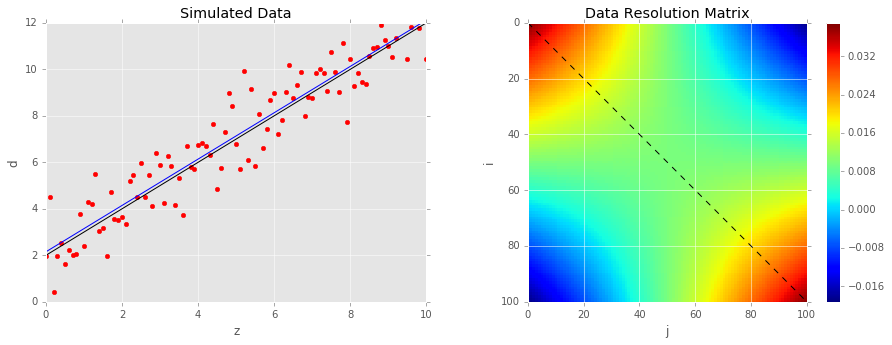

In [69]:
# data resolution matrix

# z-axis
z = np.arange(101) / 10

# simulate data (true and, add noise to simulate observed)
dtrue = 2 + z
dobs = 2 + z + np.random.normal(0, 1, 101)

# build system matrix, solve for model estimate using least squares, calculate predicted data
G = np.array([np.ones(101), z])
GMG = inv(G.dot(G.transpose())).dot(G)
mest = GMG.dot(dobs)
dpre = G.transpose().dot(mest)

# calculate data resolution matrix
Nres = G.transpose().dot(GMG)

# build figure
plt.subplots(1, 2, figsize=(15, 5))

# simulated data with least squares fit
plt.subplot(121)
plt.scatter(z, dobs, color='red')
plt.plot(z, dtrue, color='black')
plt.plot(z, dpre, color='blue')
plt.xlim(0,10)
plt.ylim(0,12)
plt.xlabel('z')
plt.ylabel('d')
plt.title('Simulated Data')

# data resolution matrix
plt.subplot(122)
m = cm.ScalarMappable(cmap=cm.jet)
m.set_array(Nres)
plt.imshow(Nres, interpolation='nearest')
plt.plot((0,100), (0,100), color='black', ls='dashed')
plt.grid(True)
plt.colorbar(m)
plt.xlim(0,100)
plt.ylim(100,0)
plt.xlabel('j')
plt.ylabel('i')
plt.title('Data Resolution Matrix')

Because the diagonal elements of the data resolution matrix indicate how much weight a datum has in its own prediction, these diagonal elements are often singled out and called the *importance* **n** of the data.  

\begin{equation*}
\mathbf{n} = \text{diag} (\mathbf{N})\\
\end{equation*}

The data resolution matrix is not a function of the data but only the data kernel **G** (which embodies the model and experimental geometry) and any *a priori* information applied to the problem.  It can therefore be computed and studied without actually performing the experiment and can be a useful tool in experimental design.  

### 4.3 The model resolution matrix  

The data resolution matrix characterizes whether the data can be independently predicted, or resolved.  The same question can be asked about the model parameters.  To explore this question we imagine that there is a true, but unknown set of model parameters $\mathbf{m}^{\text{true}}$ that solve $\mathbf{Gm}^{\text{true}} = \mathbf{d}^{\text{obs}}$.  We then inquire how closely a particular estimate of the model parameters $\mathbf{m}^{\text{est}}$ is to this true solution.  Plugging the expression for the observed data $\mathbf{Gm}^{\text{true}} = \mathbf{d}^{\text{obs}}$ into the expression for the estimated model $\mathbf{m}^{\text{est}}=\mathbf{G}^{-g} \mathbf{d}^{\text{obs}}$ gives:

\begin{equation*}
\mathbf{m}^{\text{est}} = \mathbf{G}^{-g} \mathbf{d}^{\text{obs}} = \mathbf{G}^{-g} [\mathbf{Gm}^{\text{true}}] = [\mathbf{G}^{-g} \mathbf{G}] \mathbf{m}^{\text{true}} = \mathbf{Rm}^{\text{true}}\\
\end{equation*}  

Here, **R** is the *MxM model resolution matrix*.  If **R=I**, then each model parameter is uniquely determined.  If **R** is not an identity matrix, then the estimates of the model parameters are really weighted averages of the true model parameters.  If the model parameters have a natural ordering (as they would if they represented a discretized version of a continuous function), then plots of the rows of the resolution matrix can be useful in determining to what scale features in the model can actually be resolved.  Like the data resolution matrix, the model resolution is a function of only the data kernel and the *a priori* information added to the problem.  It is therefore independent of the actual values of the data and can therefore be another important tool in experimental design. 

As an example, we examine the resolution of the discrete version of the *Laplace Transform*:  

\begin{equation*}
d(c) = \int_0^{\infty} \exp (-cz) m(z) dz \rightarrow d_i = \sum_{j=1}^M \exp (-c_i z_j) m_j\\
\end{equation*}  

Here, the datum $d_i$ is a weighed average of the model parameters $m_j$, with weights that decline exponentially with depth *z*.  The decay rate of the exponential is controlled by the constant, $c_i$, so that the smaller *i*'s over a shallower range of depths.  Not surprisingly, the shallow model parameters are better resolved.

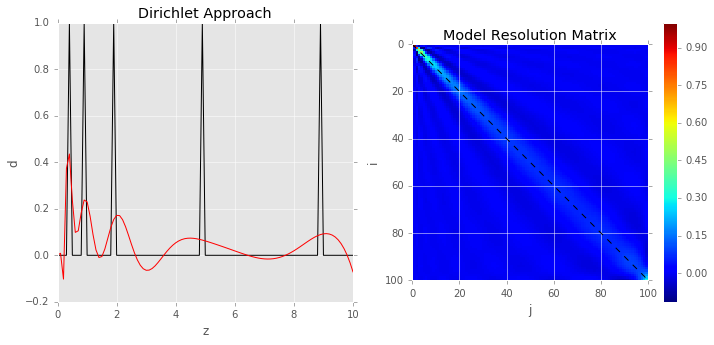

In [67]:
# Dirichlet solution

# z-axis
z = np.arange(101) / 10

# build true model - mostly zero but a few spikes
mtrue = np.zeros(101)
mtrue[4] = 1
mtrue[9] = 1
mtrue[19] = 1
mtrue[49] = 1
mtrue[89] = 1

# experiment: exponential smoothing of model
c = np.arange(81) * 0.1
G = np.exp((-c).reshape(81,1) * z)
dtrue = G.dot(mtrue)
dobs = dtrue + np.random.normal(0, 1e-12, 81)

# minimum length solution
GMG = solve(G.dot(G.transpose()) + 1e-12 * np.eye(81), G).transpose()
mest = GMG.dot(dobs)
Rres = GMG.dot(G)

# build figure
plt.subplots(1, 2, figsize=(18, 5))

# true model parameters
plt.subplot(131)
plt.plot(z, mtrue, color='black')
plt.plot(z, mest, color='red')
plt.xlim(0,10)
plt.ylim(-0.2,1)
plt.xlabel('z')
plt.ylabel('d')
plt.title('Dirichlet Approach')

# model resolution matrix
plt.subplot(132)
m = cm.ScalarMappable(cmap=cm.jet)
m.set_array(Rres)
plt.imshow(Rres, interpolation='nearest')
plt.plot((0,100), (0,100), color='black', ls='dashed')
plt.grid(True)
plt.colorbar(m)
plt.xlim(0,100)
plt.ylim(100,0)
plt.xlabel('j')
plt.ylabel('i')
plt.title('Model Resolution Matrix')

### 4.4 The unit covariance matrix  

The covariance of the model parameters depends on the covariance of the data and the way in which error is mapped from data to model parameters.  This mapping is a function of only the data kernel and the generalized inverse, not the data itself.  A *unit covariance matrix* can be defined to characterize the degree of error amplification that occurs in the mapping.  If the data are assumed to be uncorrelated and to have uniform variance $\sigma^2$, the unit covariance is given by:  

\begin{equation*}
[\text{cov}_u \: \mathbf{m}] = \sigma^{-2} \mathbf{G}^{-g} [\text{cov} \: \mathbf{d}] \mathbf{G}^{-g \text{T}}=\mathbf{G}^{-g} \mathbf{G}^{-g \text{T}}\\
\end{equation*}

Even if the data are correlated, one can often find some normalization of the data covariance matrix, so that one can define a *unit data covariance matrix* $[\text{cov}_u \: \mathbf{d}]$, related to the model covariance matrix by:  

\begin{equation*}
[\text{cov}_u \: \mathbf{m}] = \mathbf{G}^{-g} [\text{cov}_u \: \mathbf{d}] \mathbf{G}^{-g \text{T}}\\
\end{equation*}  

The unit covariance matrix is a useful tool in experimental design, especially because it is independent of the actual values and variances of the data themselves.  

As an example, reconsider the problem of fitting a straight line to *(z, d)* data.  The unit covariance matrix for intercept $m_1$ and slope $m_2$ is given by:  

\begin{equation*}
[\text{cov}_u \: \mathbf{m}] = \frac{1}{N \sum z_i^2 - (\sum z_i)^2} 
\begin{bmatrix} \sum z_i^2 & - \sum z_i \\ - \sum z_i & N \end{bmatrix}\\
\end{equation*}  

Note that the estimates of intercept and slope are uncorrelated only when the data are centered about z=0.  The overall size of the variance is controlled by the denominator of the fraction.  If all the *z* values are nearly equal, then the denominator of the fraction is small and the variance of the intercept and slope is large.  On the other hand, if the *z* values have a large spread, the denominator is large, and the variance is small.

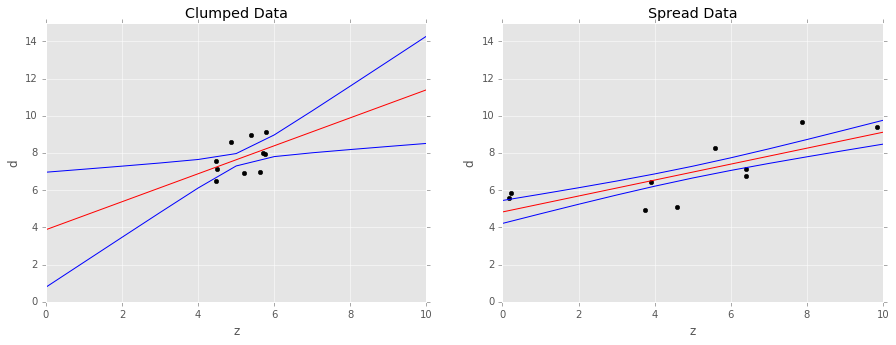

In [4]:
# least squares fit to two cases of synthetic data (distinguised by the spacing of the z's)

# CASE 1: data clumped in middle of interval
z1 = np.sort(np.random.uniform(4,6,10))
sd1 = 1
dobs1 = 5 + 0.5 * z1 + np.random.normal(0, sd1, 10)

# CASE 2: data spread out over whole interval
z2 = np.sort(np.random.uniform(0,10,10))
sd2 = 1
dobs2 = 5 + 0.5 * z2 + np.random.normal(0, sd2, 10)

# build system matrix and solve
G1 = np.array([np.ones(10), z1])
GTG_inv1 = inv(G1.dot(G1.transpose()))
mest1 = GTG_inv1.dot(G1.dot(dobs1))
Cm1 = sd1**2 * GTG_inv1
sm1 = np.power(Cm1.diagonal(), 0.5)
G2 = np.array([np.ones(10), z2])
GTG_inv2 = inv(G2.dot(G2.transpose()))
mest2 = GTG_inv2.dot(G2.dot(dobs2))
Cm2 = sd2**2 * GTG_inv2
sm2 = np.power(Cm2.diagonal(), 0.5)

# predicted data
zeval1 = 10 * np.arange(11) / 10
Go1 = np.array([np.ones(11), zeval1])
deval1 = Go1.transpose().dot(mest1)
Cdeval1 = Go1.transpose().dot(Cm1.transpose()).dot(Go1)
sdeval1 = np.power(Cdeval1.diagonal(), 0.5)
zeval2 = 10 * np.arange(11) / 10
Go2 = np.array([np.ones(11), zeval2])
deval2 = Go2.transpose().dot(mest2)
Cdeval2 = Go2.transpose().dot(Cm2.transpose()).dot(Go2)
sdeval2 = np.power(Cdeval2.diagonal(), 0.5)

# build figure
plt.subplots(1, 2, figsize=(15, 5))

# CASE 1: clumped data
plt.subplot(121)
plt.scatter(z1, dobs1, color='black')
plt.plot(zeval1, deval1, color='red')
plt.plot(zeval1, deval1+sdeval1, color='blue')
plt.plot(zeval1, deval1-sdeval1, color='blue')
plt.xlim(0,10)
plt.ylim(0,15)
plt.xlabel('z')
plt.ylabel('d')
plt.title('Clumped Data')

# CASE 2: spread data
plt.subplot(122)
plt.scatter(z2, dobs2, color='black')
plt.plot(zeval2, deval2, color='red')
plt.plot(zeval2, deval2+sdeval2, color='blue')
plt.plot(zeval2, deval2-sdeval2, color='blue')
plt.xlim(0,10)
plt.ylim(0,15)
plt.xlabel('z')
plt.ylabel('d')
plt.title('Spread Data')

### 4.5 Resolution and covariance of some generalized inverses  

The data and model resolution and unit covaraince matrices describe many interesting properties of the solutions to inverse problems.  Least squares solves the completely overdetermined problem and has perfect model resolution; minimum length solves the completely underdetermined problem and has perfect data resolution.  As we shall see later, generalized inverses that solve the intermediate mixed-determined problems will have data and model resolution matrices that are intermediate between these two extremes.  

### 4.6 Measures of goodness of resolution and covariance  

Just as we were able to quntify the goodness of the model parameters by measuring their overall prediction error and simplicity, we shall develop techniques that quantify the goodness of data and model resolution matrices and unit covariance matrices.  Because the resolution is best when the resolution matrices are identity matrices, one possible measure of resolution is based on the size, or *spread*, of the off-diagonal elements.  

\begin{equation*}
\text{spread}(\mathbf{N}) = \| \mathbf{N} - \mathbf{I} \|_2^2 = \sum_{i=1}^N \sum_{j=1}^N [N_{ij} - \delta_{ij}]^2\\
\text{spread}(\mathbf{R}) = \| \mathbf{R} - \mathbf{I} \|_2^2 = \sum_{i=1}^N \sum_{j=1}^N [R_{ij} - \delta_{ij}]^2\\
\end{equation*}

Here $\delta_{ij}$ are the elemetns of the identity matrix **I**.  These measures of the goodness of the resolution spread are based on the $L_2$ norm of the difference between the resolution matrix and an identity matrix.  They are sometimes called the *Dirichlet spread functions*.  When **R=I**, spread(**R**)=0.  

Since the unit standard deviation of the model parameters is a measure of the amount of error amplification mapped from data to model parameters, this quantity can be used to estimate the size of the unit covariance matrix as:  

\begin{equation*}
\text{size} ([\text{cov}_u \: \mathbf{m}]) = \left\| [\text{var}_u \mathbf{m}]^{1/2} \right\|_2^2 = \sum_{i=1}^M [\text{cov}_u \: \mathbf{m}]_{ii}\\
\end{equation*}

where the square root is interpreted element by element.  Note that this measure of covariance size does not take into account the size of the off-diagonal elements in the unit covariance matrix.  

### 4.7 Generalized inverses with good resolution and covariance  

Having found a way to measure quantitatively the goodness of the resolution and covariance of a generalized inverse, we now consider whether it is possible to use these measures as guiding principles for deriving generalized inverses.  This procedure is analogous to that of Chapter 3, which involves first defining measures of solution prediction error and simplicity and then using those measures to derive the least squares and minimum length estimates of the model parameters.  

#### 4.7.1 Overdetermined case  

We first consider the purely overdetermined problem of the form **Gm=d**.  We postulate that this problem has a solution of the form $\mathbf{m}^{\text{est}} = \mathbf{G}^{-g} \mathbf{d}$ and to try to determine $\mathbf{G}^{-g}$ by minimizing some combination of the above measures of goodness.  Since we previously noted that the overdetermined least squares solution had perfect model resolution, we shall try to determine $\mathbf{G}^{-g}$ by minimizing only the spread of the data resolution.  We begin by examining the spread of the *k*th row of **N**, say $J_k$:  

\begin{equation*}
J_k = \sum_{i=1}^N (N_{ki} - \delta_{ki})^2 = \sum_{i=1}^N N_{ki}^2 - 2 \sum_{i=1}^N N_{ki} \delta_{ki} + \sum_{i=1}^N \delta_{ki}^2\\
\end{equation*}

Since each of the $J_k$'s is positive, we can minimize the total $\text{spread}(\mathbf{N})=\sum J_k$ by minimizing each individual $J_k$.  We therefore insert the definition of the data resolution matrix $\mathbf{N} = \mathbf{GG}^{-g}$ into the formula for $J_k$ and minimize it with respect to the elements of the generalized inverse matrix:  

\begin{equation*}
\frac{\partial J_k}{\partial G_{qr}^{-g}} = 0\\
\end{equation*}  

We shall perform the differentiation separately for each of the three terms of $J_k$.  The first term is given by:  

\begin{equation*}
\frac{\partial}{\partial G_{qr}^{-g}} \left[ \sum_{i=1}^N \left[ \sum_{j=1}^M G_{kj} G_{ji}^{-g} \right] \left[ \sum_{p=1}^M G_{kp} G_{pi}^{-g} \right] \right] = \frac{\partial}{\partial G_{qr}^{-g}} \left[ \sum_{i=1}^N \sum_{j=1}^M \sum_{p=1}^M G_{ji}^{-g} G_{pi}^{-g} G_{kj} G_{kp} \right] = 2 \sum_{i=1}^N \sum_{j=1}^M \sum_{p=1}^M \delta_{jq} \delta_{ir} G_{pi}^{-g} G_{kj} G_{kp} = 2 \sum_{p=1}^M G_{pr}^{-g} G_{kq} G_{kp} \\
-2 \frac{\partial}{\partial G_{qr}^{-g}} \sum_{i=1}^N \sum_{j=1}^M G_{kj} G_{ji}^{-g} \delta_{ki} = -2 \sum_{i=1}^N \sum_{j=1}^M G_{kj} \delta_{jq} \delta_{ir} \delta_{ki} = -2 G_{kq} \delta_{kr}\\
\end{equation*}

The third term is zero, since it is not a function of the generalized inverse.  The complete equation is $\sum_{p=1}^M G_{kq} G_{kp} G_{pr}^{-g} = G_{kq} \delta_{kr}$. After summing over *k* and converting to matrix notation, we obtain:  

\begin{equation*}
\mathbf{G}^{\text{T}} \mathbf{GG}^{-g} = \mathbf{G}^{\text{T}}\\
\end{equation*}  

Since $\mathbf{G}^{\text{T}} \mathbf{G}$ is square, we can premultiply by its inverse to solve for the generalized inverse, $\mathbf{G}^{-g}=[\mathbf{G}^{\text{T}} \mathbf{G}]^{-1} \mathbf{G}^{\text{T}}$, which is precisely the same as the formula for the least squares generalized inverse.  The least squares generalized inverse can be interpreted either as the inverse that minimizes the $L_2$ norm of the prediction error or as the inverse that minimizes the Direchlet spread of the data resolution.  

#### 4.7.2  Underdetermined case  

The data can be satisfied exactly in a purely underdetermined problem.  The data resolution matrix is, therefore, precisely an identity matrix and its spread is zero.  We might therefore try to derive a generalized inverse for this problem by minimizing the spread of the model resolution matrix with respect to the elements of the generalized inverse.  It is perhaps not particularly surprising that the generalized inverse obtained by this method is exactly the minimum length generalized inverse $\mathbf{G}^{-g} = \mathbf{G}^{\text{T}} [\mathbf{GG}^{\text{T}}]^{-1}$.  The minimu legnth solution can be interpreted either as the inverse that minimizes the $L_2$ norm of the solution legnth or as the inverse that minimizes the Dirichlet spread of the model resolution.  This is another aspect of the symmetrical relationship between the least squares and minimum length solutions.  

#### 4.7.3 The general case with Direchlet spread functions  

We seek the generalized inverse $\mathbf{G}^{-g}$ that minimizes the weighted sum of Dirichlet measures of resolution spread and covariance size.  

\begin{equation*}
\text{Minimize:} \qquad \alpha_1 \: \text{spread}(\mathbf{N}) + \alpha_2 \: \text{spread}(\mathbf{R}) + \alpha_3 \: \text{size}([\text{cov}_u \: \mathbf{m}])\\
\end{equation*}  

where the $\alpha$'s are arbitrary weighting factors.  This problem is done in exactly the same fashion as the one in Section 4.7.1, except that there is now three times as much algebra.  The result is an equation for the generalized inverse:  

\begin{equation*}
\alpha_1 [\mathbf{G}^{\text{T}} \mathbf{G}] \mathbf{G}^{-g} + \mathbf{G}^{-g} \left[ \alpha_2 [\mathbf{GG}^{\text{T}}] + \alpha_3[\text{cov}_u \: \mathbf{d}] \right] = [\alpha_1 + \alpha_2] \mathbf{G}^{\text{T}}\\
\end{equation*}  

An equation of this form is called the *Sylvester equation*.  It is just a set of linear equations in the elements of the generalized inverse $\mathbf{G}^{-g}$ and so could be solved by writing the elements of $\mathbf{G}^{-g}$ as a vector in a huge *NMxNM* matrix equation, but it has no explicit solution in terms of algebraic functions of the component matrices.  Explicit solutions can be written, however, for a variety of special choices of the weighting factors.  The least squares solution is recovered if $\alpha_1=1$ and $\alpha_2=\alpha_3=0$, and the minimum length solution is recovered if $\alpha_1=0$, $\alpha_2=1$, and $\alpha_3=0$.  Of more interest is the case in which $\alpha_1=1$, $\alpha_2=0$, and $\alpha_3$ equals some constant (say, $\epsilon^2$) and $[\text{cov}_u \: \mathbf{d}]=\mathbf{I}$.  The generalized inverse is then given by:  

\begin{equation*}
\mathbf{G}^{-g} = [\mathbf{G}^{\text{T}} \mathbf{G} + \epsilon^2 \mathbf{I}]^{-1} \mathbf{G}^{\text{T}}\\
\end{equation*}

This formula is precisely the damped least squares inverse, which we derived in the previous chapter by minimizing a combination of prediction error and solution length.  The damped least squares solution can also be interpreted as the inverse that minimizes a weighted combination of data resolution spread and covariance size.  

Another interesting solution is obtained when a weighted combination of model resolution spread and covariance size is minimized.  Setting $\alpha_1=0$, $\alpha_2=1$, $\alpha_3=\epsilon^2$, and $[\text{cov}_u \: \mathbf{d}]=\mathbf{I}$, we find:  

\begin{equation*}
\mathbf{G}^{-g} = \mathbf{G}^{\text{T}} [ \mathbf{GG}^{text{T}} + \epsilon^2 \mathbf{I}]^{-1}\\
\end{equation*}

This solution might be termed *damped minimum length*.  It will be important in the discussion later in this chapter, because it is the Dirichlet analog to the Backus-Gilbert generalized inverse that will be introduced.  

Note that it is quite possible for these generalized inverses to possess resolution matrices containing *negative* off-diagonal elements.  Physically, an average makes most sense when it contained only positive weighting factors, so negative elements interfere with the interpretation of the rows of **R** as localized averages.  In principle, it is possible to include non-negativity as a constraint when choosing the generalized inverse by minimizing the spread functions.  However, in practice, this constraint is never implemented because it makes the calculation of the generalized inverse very difficult.  Furthermore, the more constraints that one places on **R**, the less localized it tends to become.  

### 4.8 Sidelobes and the Backus-Gilbert spread function  

The Dirichlet spread function is not a particularly appropriate measure of the goodness of resolution when the data or model parameters have a natural ordering because the off-diagonal elemetns of the resolution matrix are all weighted equally, regardless of whether they are close or far from the main diagonal.  We would much prefer that any large elements be close to the main diagonal when there is natural ordering because the rows of the resolution matrix then represent *localized* averaging functions.  

If one uses the Dirichlet spread function to compute a generalized inverse, it will often have *sidelobes*, that is, large amplitude regions in the resolution matrices far from the main diagonal.  We would prefer to find a generalized inverse without sidelobes, even at the expense of widening the band of nonzero elements near the main diagonal, since a solution with such a resolution matrix is then interpretable as a localized average of physically adjacent model parameters.  

We therefore add a weighting factor *w(i, j)* to the measure of spread that weights the *(i,j)* element of **R** according to its physical distance from the diagonal element.  This weighting preferentially selects resolution matrices that are "spiky", or "deltalike".  If the natural ordering were a simple linear one, then the choice $w(i,j)=(i-j)^2$ would be reasonable.  If the ordering is multidimensional, a more complicated weighting factor is needed.  It is usually convenient to choose the spread function so that the diagonal elements have no weight, i.e., *w(i,i)=0*, and so that *w(i,j)* is always non-negative and symmetric in *i* and *j*.  The new spread function, often called the Backus-Gilbert spread function is then given by:  

\begin{equation*}
\text{spread}(\mathbf{R})= \sum_{i=1}^M \sum_{j=1}^M w(i,j) [R_{ij} - \delta_{ij}]^2 = \sum_{i=1}^M \sum_{j=1}^M w(i,j)R_{ij}^2\\
\end{equation*}  

A similar expression holds for the spread of the data resolution.  One can now use this measure of spread to derive new generalized inverses.  Their sidelobes will be smaller than those based on the Dirichlet spread functions.  On the other hand, they are sometimes worse when judged by other criteria.  As we shall see, the Backus-Gilbert generalized inverse for the completely underdetermined problem does not exactly satisfy the data, even though the analogous minimum length generalized inverse does.  These facts demonstrate that there are unavoidable tradeoffs inherent in finding solutions to inverse problems.  

### 4.9 The Backus-Gilbert generalized inverse for the underdetermined problem  

This problem is analogous to deriving the minimum length solution by minimizing the Dirichlet spread of model resolution. Since it is very easy to satisfy the data when the problem is underdetermined (so that the data resolution has small spread), we shall find a generalized inverse that minimizes the spread of the model resolution alone.  

We seek the generalized inverse $\mathbf{G}^{-g}$ that minimizes the Backus-Gilbert spread of model resolution.  Since the diagonal elemetns of the model resolution matrix are given no weight, we also require that the resulting model resolution matrix satisfy the equation:  

\begin{equation*}
\sum_{j=1}^{M} R_{ij} = [1]_i\\
\end{equation*}  

This constraint ensures that the diagonal of the resolution matrix is finite and that the rows are unit averaging functions acting on the true model parameters.  Writing the spread of one row of the resolution matrix as $J_k$ and inserting the expression for the resolution matrix, we have:  

\begin{equation*}
\begin{aligned}
J_k &= \sum_{l=1}^M w(l,k) R_{kl} R_{kl} \\
& = \sum_{l=1}^M w(l,k) \left[ \sum_{i=1}^N G_{ki}^{-g} G_{il} \right] \left[ \sum_{j=1}^N G_{kj}^{-g} G_{jl} \right] \\
& = \sum_{i=1}^N \sum_{j=1}^N G_{ki}^{-g} G_{kj}^{-g} \sum_{l=1}^M w(l,k) G_{il} G_{jl} \\
& = \sum_{i=1}^N \sum_{j=1}^N G_{ki}^{-g} G_{kj}^{-g} S_{ij}^{(k)}
\end{aligned}\\
\end{equation*}  

Where the quantity $S_{ij}^{(k)}$ is defined as:

\begin{equation*}
S_{ij}^{(k)} = \sum_{l=1}^M w(l, k) G_{il} G_{jl}\\
\end{equation*}

The left-hand side of the constraint equation $\Sigma_j R_{ij} = [1]_i$ can also be written in terms of the generalized inverse:  

\begin{equation*}
\sum_{k=1}^M R_{ik} = \sum_{k=1}^M \left[ \sum_{j=1}^N G_{ij}^{-g} G_{jk} \right] = \sum_{j=1}^N G_{ij}^{-g} \sum_{k=1}^M G_{jk} = \sum_{j=1}^N G_{ij}^{-g} u_j\\
\end{equation*}

Here, the quantity $u_j$ is defined as:

\begin{equation*}
u_j = \sum_{k=1}^M G_{jk}\\
\end{equation*}  

The problem of minimizing $J_k$ with respect to the elements of the gernealized inverse (under the given constraints) can be solved through the use of Lagrange multipliers.  We first define a Lagrange function $\Phi$ such that:  

\begin{equation*}
\Phi = \sum_{i=1}^N \sum_{j=1}^M G_{ki}^{-g} G_{kj}^{-g} S_{ij}^{(k)} + 2 \lambda \sum_{j=1}^N G_{kj}^{-g} u_j\\
\end{equation*}  

where $2 \lambda$ is the Lagrange multiplier.  We then differentiate $\Phi$ with respect to the elemetns of the generalized inverse and set the result equal to zero as:  

\begin{equation*}
\frac{\partial \Phi}{\partial G_{kp}^{-g}} = 2 \sum_{i=1}^N S_{pi}^{(k)} G_{ki}^{-g} + 2 \lambda u_p = 0\\
\end{equation*}

(Note that one can solve for each row of the gernealized inverse separately, so that it is only necessary to take derivatives with respect to the elements in the *k*th row.)  The above equation must be solved along with the original constraint equation.  Treating the *k*th row of $\mathbf{G}^{-g}$ as the transform of a column-vector $\mathbf{g}^{(k)}$ and the quantity $S_{ij}^{(k)}$ as a matrix $\mathbf{S}^{(k)}$, we can write these equations as the matrix equation:  

\begin{equation*}
\begin{bmatrix} \mathbf{S}^{(k)} & \mathbf{u} \\ \mathbf{u}^{\text{T}} & 0 \end{bmatrix}
\begin{bmatrix} \mathbf{g}^{(k)} \\ \lambda \end{bmatrix} =
\begin{bmatrix} \mathbf{O} \\ 1 \end{bmatrix}\\
\end{equation*}

This is a square $(N+1) \times (N+1)$ system of linear equations that must be solved for the *N* elements of the *k*th row of the generalized inverse and for the one Lagrange multiplier $\lambda$.  

The matrix equation can be solved explicitly using a variant of the *bordering method* of linear algebra, which is used to construct the inverse of a matrix by partitioning it into submatrices with simple properties.  Suppose that the inverse of the symmetric matrix in the above equation exists and that we partition it into an $N \times N$ symmetric square matrix **A**, vector **b**, and scalar *c*. By assumption, pre-multiplication by the inverse yields the identity matrix:

\begin{equation*}
\begin{bmatrix} \mathbf{A} & \mathbf{b} \\ \mathbf{b}^{\text{T}} & c \end{bmatrix}
\begin{bmatrix} \mathbf{S}^{(k)} & \mathbf{u} \\ \mathbf{u}^{\text{T}} & 0 \end{bmatrix} =
\begin{bmatrix} \mathbf{I} & \mathbf{O} \\ 0 & 1 \end{bmatrix} =
\begin{bmatrix} \mathbf{AS}^{(k)} + \mathbf{bu}^{\text{T}} & \mathbf{Au} \\ \mathbf{b}^{\text{T}} \mathbf{S}^{(k)} + \mathbf{cu}^{\text{T}} & \mathbf{b}^{\text{T}} \mathbf{u} \end{bmatrix}\\
\end{equation*}  

The unknown submatrices **A**, **b**, and *c* can now be determined by equating the submatrices:

\begin{equation*}
\mathbf{AS}^{(k)} + \mathbf{bu}^{\text{T}} = \mathbf{I} \qquad \text{so that} \qquad \mathbf{A} = \left[ \mathbf{S}^{(k)} \right]^{-1} [\mathbf{I} - \mathbf{bu}^{\text{T}}] \\
\mathbf{Au} = \mathbf{O} \qquad \text{so that} \qquad \left[ \mathbf{S}^{(k)} \right]^{-1} \mathbf{u} = \mathbf{bu}^{\text{T}} \mathbf{S}^{(k)} \mathbf{u} \qquad \text{and} \qquad \mathbf{b} = \frac{\left[ \mathbf{S}^{(k)} \right]^{-1} \mathbf{u}}{\mathbf{u}^{\text{T}} \left[ \mathbf{S}^{(k)} \right]^{-1} \mathbf{u}} \\
\mathbf{b}^{\text{T}} \mathbf{S}^{(k)} + c \mathbf{u}^{\text{T}} = 0 \qquad \text{so that} \qquad c = \frac{-1}{\mathbf{u}^{\text{T}} \left[ \mathbf{S}^{(k)} \right]^{-1} \mathbf{u}}\\
\end{equation*}

The generalized inverse, written with summations is:

\begin{equation*}
G_{kl}^{-g} = \frac{\sum_{i=1}^N u_i \left[ \left( \mathbf{S}^{(k)} \right)^{-1} \right]_{il}}{\sum_{i=1}^N \sum_{j=1}^N u_i \left[ \left( \mathbf{S}^{(k)} \right)^{-1} \right]_{ij} u_j} \\
\end{equation*}

This generalized inverse is the Backus-Gilbert analog to the minimum length solution.  

As an example, let's compare the Dirichlet and Backus-Gilbert solutions for the Laplace transform problem discussed earlier:

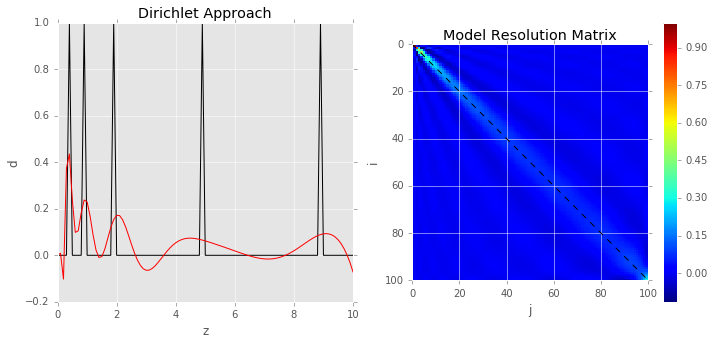

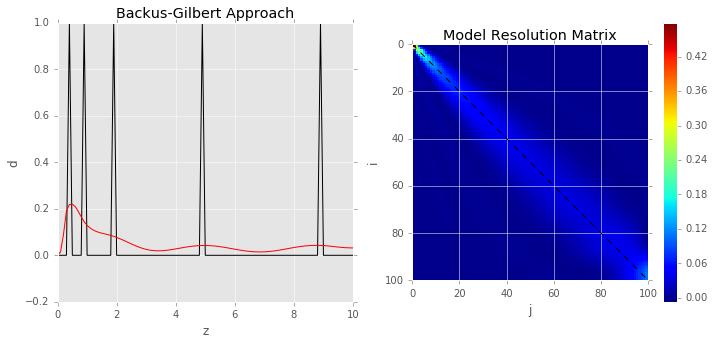

In [31]:
# Dirichlet solution

# z-axis
z = np.arange(101) / 10

# build true model - mostly zero but a few spikes
mtrue = np.zeros(101)
mtrue[4] = 1
mtrue[9] = 1
mtrue[19] = 1
mtrue[49] = 1
mtrue[89] = 1

# experiment: exponential smoothing of model
c = np.arange(81) * 0.1
G = np.exp((-c).reshape(81,1) * z)
dtrue = G.dot(mtrue)
dobs = dtrue + np.random.normal(0, 1e-12, 81)

# minimum length solution
GMG = solve(G.dot(G.transpose()) + 1e-12 * np.eye(81), G).transpose()
mest = GMG.dot(dobs)
Rres = GMG.dot(G)

# build figure
plt.subplots(1, 2, figsize=(18, 5))

# true model parameters
plt.subplot(131)
plt.plot(z, mtrue, color='black')
plt.plot(z, mest, color='red')
plt.xlim(0,10)
plt.ylim(-0.2,1)
plt.xlabel('z')
plt.ylabel('d')
plt.title('Dirichlet Approach')

# model resolution matrix
plt.subplot(132)
m = cm.ScalarMappable(cmap=cm.jet)
m.set_array(Rres)
plt.imshow(Rres, interpolation='nearest')
plt.plot((0,100), (0,100), color='black', ls='dashed')
plt.grid(True)
plt.colorbar(m)
plt.xlim(0,100)
plt.ylim(100,0)
plt.xlabel('j')
plt.ylabel('i')
plt.title('Model Resolution Matrix')

# Backus-Gilbert solution

# z-axis
z = np.arange(101) / 10

# build true model - mostly zero but a few spikes
mtrue = np.zeros(101)
mtrue[4] = 1
mtrue[9] = 1
mtrue[19] = 1
mtrue[49] = 1
mtrue[89] = 1

# experiment: exponential smoothing of model
c = np.arange(81) * 0.1
G = np.exp((-c).reshape(81,1) * z)
dtrue = G.dot(mtrue)
dobs = dtrue + np.random.normal(0, 1e-12, 81)

GMG = np.zeros((101,81))
u = G.dot(np.ones(101))

# construct Backus-Gilbert solution row-wise
for k in range(1, 101):
    S = G.dot(np.diag(np.power(np.arange(0, 101) - k, 2))).dot(G.transpose()) + 1e-6 * np.eye(81)
    uSinv = solve(S, u.transpose())
    GMG[k,] = uSinv / uSinv.dot(u)
    
# calculate model estimate and model resolution matrix
mest = GMG.dot(dobs)
Rres = GMG.dot(G)

# build figure
plt.subplots(1, 2, figsize=(18, 5))

# true model parameters
plt.subplot(131)
plt.plot(z, mtrue, color='black')
plt.plot(z, mest, color='red')
plt.xlim(0,10)
plt.ylim(-0.2,1)
plt.xlabel('z')
plt.ylabel('d')
plt.title('Backus-Gilbert Approach')

# model resolution matrix
plt.subplot(132)
m = cm.ScalarMappable(cmap=cm.jet)
m.set_array(Rres)
plt.imshow(Rres, interpolation='nearest')
plt.plot((0,100), (0,100), color='black', ls='dashed')
plt.grid(True)
plt.colorbar(m)
plt.xlim(0,100)
plt.ylim(100,0)
plt.xlabel('j')
plt.ylabel('i')
plt.title('Model Resolution Matrix')

The Backus-Gilbert solution is the smoother of the two and has a corresponding model resolution matrix that consists of a single band along the main diagonal.  The Dirichlet solution has more details but also more artifacts (such as negative values at z~=3).  They are associated with teh large-amplitude sidelobes in the corresponding model resolution matrix.  

### 4.10 Including the covariance size  

The measure of goodness that was used to determine the Backus-Gilbert inverse can be modified to include a measure of the covariance size of the model parameters.  We shall use the same measure as we did when considering the Dirichlet spread functions, so that goodness is measured by:  

\begin{equation*}
\alpha \: \text{spread}(\mathbf{R}) + (1 - \alpha) \: \text{size}([\text{cov}_u \: \mathbf{m}]) = \alpha \sum_{i=1}^M \sum_{j=1}^M w(i,j) R_{ij}^2 + (1 - \alpha) \sum_{i=1}^M [\text{cov}_u \: \mathbf{m}]_{ii}\\
\end{equation*}  

Where, $0 \leq \alpha \leq 1$ is a weighting factor that determines the relative contribution of model resolution and covariance to the measure of the goodness of the generalized inverse.  The goodness $J`_k$ of the *k*th row is then:

\begin{equation*}
\begin{aligned}
J`_k &= \alpha \sum_{l=1}^M w(k,l) R_{kl}^2 + (1 - \alpha) [\text{cov}_u \: \mathbf{m}]_{kk} \\
& = \alpha \sum_{i=1}^N \sum_{j=1}^N G_{ki}^{-g} G_{kj}^{-g} [S_{ij}]_k + (1 - \alpha) \sum_{i=1}^N \sum_{j=1}^N G_{ki}^{-g} G_{kj}^{-g} [\text{cov}_u \: \mathbf{d}]_{ij} \\
& = \sum_{i=1}^N \sum_{j=1}^N G_{ki}^{-g} G_{kj}^{-g} S`_{ij}^{(k)} 
\end{aligned} \\
\end{equation*}

Where the quantity $S`_{ij}^{(k)}$ is defined by the equation:

\begin{equation*}
S`_{ij}^{(k)} = \alpha S_{ij}^{(k)} + (1 - \alpha) [\text{cov}_u \: \mathbf{d}]_{ij}\\
\end{equation*} 

Since the function $J`_k$ has exactly the same form as $J_k$ had in the previous section, the generalized inverse is just the previous result with $S_{ij}^{(k)}$ replaced by $S`_{ij}^{(k)}$:

\begin{equation*}
G_{kl}^{-g} = \frac{\sum_{i=1}^N u_i \left[ \left( \mathbf{S}`^{(k)} \right)^{-1} \right]_{il}}{\sum_{i=1}^N \sum_{j=1}^N u_i \left[ \left( \mathbf{S}`^{(k)} \right)^{-1} \right]_{ij} u_j}\\
\end{equation*}

This generalized inverse is the Backus-Gilbert analog to the damped minimum length solution.

In higher dimensions, the definition of **S** is more complicated, since the weight function must represent the physical distance between model parameters.

### 4.11 The trade-off of resolution and variance  

Suppose that one is attempting to determine a set of model parameters that represents a discretized version of a continuous function, such as X-ray opacity in the medical tomography problem below.  If the discretization is made very fine, then the X-rays will not sample every box; the problem will be underdetermined.  If we try to determine the opacity of each box individually, then estimates of opacity will tend to have rather large variance.  Few boxes will have several X-rays passing through them, so that little averaging out of the errors will take place.  On the other hand, the boxes are very small - and very small features can be detected (the resolution is very good).  The large variance can be reduced by increasing the box size (or alternatively, averaging several neighboring boxes).  Each of these larger regions will then contain several X-rays, and noise will tend to be averaged out.  But because the regions are now larger, small features can no longer be detected and the resolution of the X-ray opacity has become poorer.

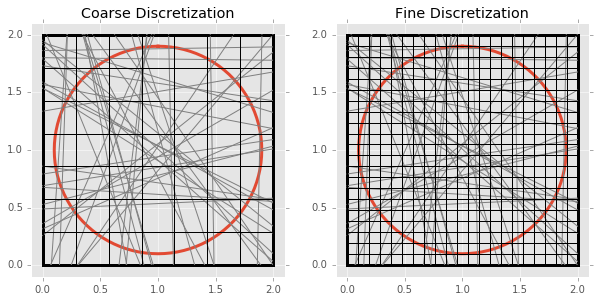

In [66]:
# COARSE DISCRETIZATION

# box
plt.subplots(1, 2, figsize=(10, 5))
ax1 = plt.subplot(121, aspect='equal')
ax1.add_patch(patches.Rectangle((0, 0), 2, 2, lw=3, ec='black', fill=False))
plt.xlim(-0.1,2.1)
plt.ylim(-0.1,2.1)

# circle
R = 0.9
x0 = 1
y0 = 1
th = 2 * math.pi * np.arange(101) / 100
x = x0 + R * np.sin(th)
y = y0 + R * np.cos(th)
plt.plot(x,y, linewidth=3)

# rays
x1 = np.random.uniform(0, 2, 21)
x2 = np.random.uniform(0, 2, 21)
y1 = np.random.uniform(0, 2, 21)
y2 = np.random.uniform(0, 2, 21)
for i in range(0,21):
    plt.plot((x1[i], x2[i]), (0, 2), color='gray')
    plt.plot((0, 2), (y1[i], y2[i]), color='gray')
    
# coarse discretization grid
xg = 0 + 2 * np.arange(7+1) / 7
yg = 0 + 2 * np.arange(7+1) / 7
for i in range(0,7+1):
    plt.plot((xg[0], xg[7]), (yg[i], yg[i]), color='black')
    plt.plot((xg[i], xg[i]), (yg[0], yg[7]), color='black')

plt.title('Coarse Discretization')
    
# FINE DISCRETIZATION

# box
ax2 = plt.subplot(122, aspect='equal')
ax2.add_patch(patches.Rectangle((0, 0), 2, 2, lw=3, ec='black', fill=False))
plt.xlim(-0.1,2.1)
plt.ylim(-0.1,2.1)

# circle
plt.plot(x,y, linewidth=3)

# rays
for i in range(0,21):
    plt.plot((x1[i], x2[i]), (0, 2), color='gray')
    plt.plot((0, 2), (y1[i], y2[i]), color='gray')
    
# fine discretization grid
xg = 0 + 2 * np.arange(21+1) / 21
yg = 0 + 2 * np.arange(21+1) / 21
for i in range(0,21+1):
    plt.plot((xg[0], xg[21]), (yg[i], yg[i]), color='black')
    plt.plot((xg[i], xg[i]), (yg[0], yg[21]), color='black')
    
plt.title('Fine Discretization')

This scenario illustrates an important trade-off between model resolution spread and variance size.  One can be decreased only at the expense of increasing the other.  We can study this trade-off by choosing a generalized inverse that minimizes a weighted sum of resolution spread and covariance size:  

\begin{equation*}
\alpha \: \text{spread} (\mathbf{R}) + (1 - \alpha) \: \text{size} ( [\text{cov}_u \: \mathbf{m}])\\
\end{equation*}

If the weighting parameter $\alpha$ is set near 1, then the model resolution matrix of the generalized inverse will have small spread, but the model parameters will have large variance.  If $\alpha$# is set close to 0, then the model parameters will have relatively small variance, but hte resolution will have a large spread.  A *trade-off curve* can be defined by varying $\alpha$ on the interval (0,1) as below.  Such curves can be helpful in choosing a generalized inverse that has an optimum trade-off in model resolution and variance (judged by criteria appropriate to the problem at hand).  

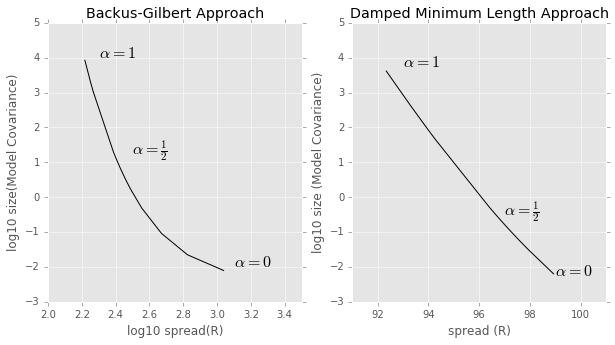

In [67]:
# trade-off of resolution and variance

# z-axis
z = np.arange(101) / 10

# experiment: exponential smoothing of model
c = np.arange(81) * 0.1
G = np.exp((-c).reshape(81,1) * z)

# Part 1: Backus-Gilbert
alphavec = np.array([(0.999, 0.995, 0.99, 0.5, 0.4, 0.3, 0.2, 0.1, 0.05, 0.01, 0.001, 0.0001, 0.00001)])
iahalf = np.where(alphavec == 0.5)[1][0]
spreadR1 = np.zeros(alphavec.shape[1])
sizeC1 = np.zeros(alphavec.shape[1])

for a in range(0, alphavec.shape[1]):
    # construct Backus-Gilbert solution row-wise
    GMG = np.zeros((101, 81))
    u = G.dot(np.ones(101))
    
    for k in range(0, 101):
        S = G.dot(np.diag(np.power(np.arange(0, 101) - k, 2))).dot(G.transpose())
        Sp = alphavec[0,a] * S + (1 - alphavec[0,a]) * np.eye(81)
        uSpinv = solve(Sp, u.transpose())
        GMG[k,] = uSpinv / uSpinv.dot(u)
        
    Cm1 = GMG.dot(GMG.transpose())
    R1 = GMG.dot(G)
    sizeC1[a] = np.sum(np.diag(Cm1))
    
    spreadR1[a] = np.sum(np.sum(
            np.multiply(np.square(np.arange(1,102).reshape(101,1) * np.ones(101) - np.ones(101).reshape(101,1) * np.arange(1,102)),
                       np.square(R1))))
    
    
# build figure
plt.subplots(1, 2, figsize=(10, 5))

# backus-gilbert approach
ax = plt.subplot(121)
plt.plot(np.log10(spreadR1), np.log10(sizeC1), color='black')
plt.xlim(2,3.5)
plt.ylim(-3,5)
plt.xlabel('log10 spread(R)')
plt.ylabel('log10 size(Model Covariance)')
plt.title('Backus-Gilbert Approach')
ax.text(2.3, 4, r'$\alpha=1$', fontsize=16)
ax.text(2.5, 1.25, r'$\alpha=\frac{1}{2}$', fontsize=16)
ax.text(3.1, -2, r'$\alpha=0$', fontsize=16)

# Part 2: Damped minimum length

alphavec = np.array([(0.9999, 0.999, 0.995, 0.99, 0.5, 0.4, 0.3, 0.2, 0.1, 0.05, 0.01)])
iahalf = np.where(alphavec == 0.5)[1][0]
spreadR2 = np.zeros(alphavec.shape[1])
sizeC2 = np.zeros(alphavec.shape[1])

for a in range(0, alphavec.shape[1]):
    GMG = solve(alphavec[0,a] * G.dot(G.transpose()) + (1 - alphavec[0,a]) * np.eye(81), alphavec[0,a] * G)
    
    Cm2 = GMG.dot(GMG.transpose())
    R2 = GMG.transpose().dot(G)
    sizeC2[a] = np.sum(np.diag(Cm2))
    spreadR2[a] = np.sum(np.square(R2 - np.eye(101)))

# damped minimum length
ax = plt.subplot(122)
plt.plot(spreadR2, np.log10(sizeC2), color='black')
plt.xlim(91,101)
plt.ylim(-3,5)
plt.xlabel('spread (R)')
plt.ylabel('log10 size (Model Covariance)')
plt.title('Damped Minimum Length Approach')
ax.text(93, 3.75, r'$\alpha=1$', fontsize=16)
ax.text(97, -0.5, r'$\alpha=\frac{1}{2}$', fontsize=16)
ax.text(99, -2.25, r'$\alpha=0$', fontsize=16)

Trade-off curves play an important role in continuous inverse theory, where the discretization is (so to speak) infinitely fine, and all problems are underdetermined.  It is known that in this continuous limit the curves are monotonic and possess asymptotes in resolution and variance.  The process of approximating a continuous function by a finite set of discrete parameters somewhat complicates this picture.  The resolution and variance, and indeed the solution itself, are dependent on the parameterization, so it is difficult to make any definitive statement regarding the properties of the trade-off curves.  Nevertheless, if the discretization is sufficiently fine, the discrete trade-off curves are usually close to ones obtained with the use of continuous inverse thoery.  Therefore, discretizations should alwyas be made as fine as computational considerations permit.  

### 4.12 Techniques for computing resolution  

